In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", rc={'axes.edgecolor':'0.1', 'grid.color':'0.9'})
import pandas as pd
import numpy as np

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": "Times New Roman",
})

In [36]:
data = {}
llama7b = pd.read_csv('ModelSweep-11-09-2024-2352.csv' ) #'ModelSweep-26-09-2024-1624.csv')
fr_labels = ['DSPy (vanilla)','MT-LLM']
models = ["llama2:7b","llama2:70b","llama3:7b","llama3:70b", "llama3.1:7b", "llama3.1:70b"]
llama70b = pd.read_csv('ModelSweep-16-09-2024-1329.csv')#'ModelSweep-08-10-2024-1052-70B.csv')
# llama70b = llama70b.drop(["Exception"], axis=1)
llama7b['Model'] = llama7b['Model'].replace('llama2', 'llama2:7b')
llama7b['Model'] = llama7b['Model'].replace('llama3', 'llama3:7b')
llama7b['Model'] = llama7b['Model'].replace('llama3.1', 'llama3.1:7b')
llama7b['Program'] = llama7b['Program'].replace('Jac', 'MT-LLM')
llama70b['Program'] = llama70b['Program'].replace('Jac', 'MT-LLM')
temp1 = llama7b[llama7b['Program'].str.match(r'^DSPy$')]
temp2 = llama70b[llama70b['Program'].str.match(r'^DSPy$')]
data['DSPy (vanilla)'] = pd.concat([temp1, temp2])

temp3 = llama7b[llama7b['Program'].str.match(r'^MT-LLM$')]
temp4 = llama70b[llama70b['Program'].str.match(r'^MT-LLM$')]
data['MT-LLM'] = pd.concat([temp3, temp4])

df = pd.concat([data[framework] for framework in fr_labels])
df = df[df["QuestionID"] <=2050]
df['Model'] = pd.Categorical(df['Model'], categories=models, ordered=True)

/var/folders/c_/hm8lg21n1h5d5pltsc86x1j00000gn/T/ipykernel_75938/3044029542.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dspy_avg = ddf[ddf['Program'] == 'DSPy'].groupby('Model')['ExactMatch'].mean()
/var/folders/c_/hm8lg21n1h5d5pltsc86x1j00000gn/T/ipykernel_75938/3044029542.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mt_llm_avg = ddf[ddf['Program'] == 'MT-LLM'].groupby('Model')['ExactMatch'].mean()
/var/folders/c_/hm8lg21n1h5d5pltsc86x1j00000gn/T/ipykernel_75938/3044029542.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a F

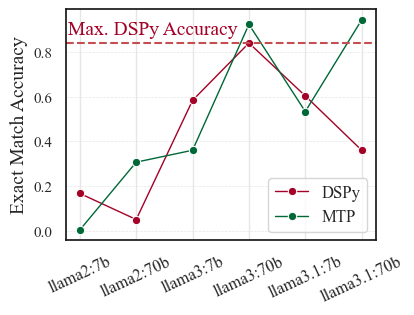

In [37]:
ddf = df
ddf['ExactMatch'] = ddf['ExactMatch'].astype(int)
dspy_avg = ddf[ddf['Program'] == 'DSPy'].groupby('Model')['ExactMatch'].mean()
max_dspy_avg = dspy_avg.max()
max_dspy_avg
mt_llm_avg = ddf[ddf['Program'] == 'MT-LLM'].groupby('Model')['ExactMatch'].mean()

fig, ax = plt.subplots(figsize=(4, 3))
colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(1.0)]
fr_colors = {'DSPy':colors[0], 'MT-LLM':colors[1]}
order = ['DSPy', 'MT-LLM']
# ax = (df.mean()).plot(kind='bar', figsize=(12, 3), width=0.8, colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14)
# sns.barplot(order  =models, hue_order = order,x="Model", y="ExactMatch",hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = fr_colors, ax=ax,edgecolor='black', linewidth=1)
sns.lineplot(errorbar=None,x="Model", y="ExactMatch", hue="Program", data=df, estimator=np.mean, palette=colors, ax=ax, linewidth=1, marker='o')
handles, labels = ax.get_legend_handles_labels()
labels = ['DSPy','MTP']
ax.legend(handles,labels, loc="lower right", fontsize=12, ncol=1)
ax.set_xlabel("")
ax.set_xticklabels(rotation=25, labels=models, fontsize=12)
ax.set_ylabel(r"Exact Match Accuracy", fontsize=14)
plt.grid(axis='y',linestyle='--', linewidth=0.5)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
plt.axhline(y=max_dspy_avg, color='r', linestyle='--', label=f'Max DSPy Mean: {max_dspy_avg:.2f}')
# plt.ylim(0.5, 1)
ax.text(0.5 + 0.8, 0.90, r'Max. DSPy Accuracy', ha='center', va='center', rotation='horizontal', fontsize=14, color=plt.cm.RdYlGn(0.0))
plt.show
plt.savefig('ExactMatchAcccuracy_llama.pdf', bbox_inches='tight')


In [38]:
data = {}
openai = pd.read_csv('ModelSweep-21-06-2024-0103.csv')
openai_comp = pd.read_csv('ModelSweep-25-06-2024-2249.csv')
openai['Program'] = openai['Program'].replace('Jac', 'MT-LLM')

data['DSPy (vanilla)'] = openai[openai['Program'].str.match(r'^DSPy$')]
data['MT-LLM'] = openai[openai['Program'].str.match(r'^MT-LLM$')]
data['DSPy (compiled)'] = openai_comp[openai_comp['Program'].str.match(r'^DSPy_Compiled$')]


fr_labels = ['DSPy (vanilla)','DSPy (compiled)', 'MT-LLM']
df = pd.concat([data[framework] for framework in fr_labels])
df = df[df["QuestionID"] <=2050]
models = df['Model'].unique()



/var/folders/c_/hm8lg21n1h5d5pltsc86x1j00000gn/T/ipykernel_75938/725300938.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(rotation=25, labels=models, fontsize=12)


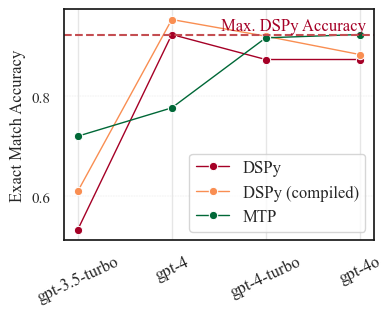

In [39]:
ddf = df
ddf['ExactMatch'] = ddf['ExactMatch'].astype(int)
dspy_avg = ddf[ddf['Program'] == 'DSPy'].groupby('Model')['ExactMatch'].mean()
max_dspy_avg = dspy_avg.max()
max_dspy_avg
mt_llm_avg = ddf[ddf['Program'] == 'MT-LLM'].groupby('Model')['ExactMatch'].mean()

fig_2, ax = plt.subplots(figsize=(4, 3))
colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(0.25),plt.cm.RdYlGn(1.0)]
fr_colors = {'DSPy':colors[0], 'DSPy (compiled)':colors[1], 'MT-LLM':colors[1]}
order = ['DSPy', 'MT-LLM']
# ax = (df.mean()).plot(kind='bar', figsize=(12, 3), width=0.8, colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14)
# sns.barplot(order  =models, hue_order = order,x="Model", y="ExactMatch",hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = fr_colors, ax=ax,edgecolor='black', linewidth=1)
sns.lineplot(errorbar=None,x="Model", y="ExactMatch", hue="Program", data=df, estimator=np.mean, palette=colors, ax=ax, linewidth=1, marker='o')
handles, labels = ax.get_legend_handles_labels()
labels = ['DSPy','DSPy (compiled)', 'MTP']
ax.legend(handles,labels,loc='lower right', fontsize=12, ncol=1)
ax.set_xlabel("")
ax.set_xticklabels(rotation=25, labels=models, fontsize=12)
ax.set_ylabel(r"Exact Match Accuracy", fontsize=12)
plt.grid(axis='y',linestyle='--', linewidth=0.35)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.axhline(y=max_dspy_avg, color='r', linestyle='--', label=f'Max DSPy Mean: {max_dspy_avg:.2f}')
# plt.ylim(0.5, 1)
ax.text(0.3+2, 0.94, r'Max. DSPy Accuracy', ha='center', va='center', rotation='horizontal', fontsize=12,color=plt.cm.RdYlGn(0.0))
plt.show
plt.savefig('ExactMatchAcccuracy_openai.pdf', dpi=300, bbox_inches='tight')
